In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

## 3.2.1 ⽣成数据集
设训练数据集样本数为1000,
输⼊个数（特征数）为2.
给定随机⽣成的批量样本特征X ∈ R1000×2,
我们使⽤线性回归模型真实权重w = [2, −3.4]⊤和偏差b = 4.2,
以及⼀个随机噪声项ϵ来⽣成标签<br/>
y = Xw + b + ϵ <br/>
其中噪声项ϵ服从均值为0、标准差为0.01的正态分布。噪声代表了数据集中⽆意义的⼲扰。下⾯，
让我们⽣成数据集。

In [58]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))  # 每行长度为2
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b  # 每行长度为1的标量
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [59]:
features[0], labels[0]

(
 [ 0.5925345 -0.7567092]
 <NDArray 2 @cpu(0)>,
 
 [7.960054]
 <NDArray 1 @cpu(0)>)

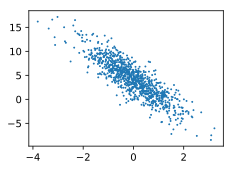

In [60]:
def use_svg_display():
    """用矢量图表示"""
    display.set_matplotlib_formats('svg')

def set_figsize(figsize = (3.5, 2.5)):
    """设置图尺寸"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1); # 加分号只显⽰图

## 3.2.2 读取数据集

In [61]:
def data_iter(batch_size, features, labels):
    """
    返回batch_size个随机样本的特征和标签
    """
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 随机顺序读取样本
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素

In [87]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 0.02328648 -0.16014808]
 [-1.7319542  -3.1177573 ]
 [ 1.2606771  -0.6657746 ]
 [ 0.36248338  0.00751651]
 [-0.6796198   0.3685243 ]
 [ 1.2637488   0.9863251 ]
 [ 0.3792675   1.2269859 ]
 [-0.35066557 -0.39136583]
 [ 0.39626074 -0.01596689]
 [-1.1648225  -0.9052212 ]]
<NDArray 10x2 @cpu(0)> 
[ 4.798949  11.331036   8.990364   4.9114113  1.5833526  3.379468
  0.7964948  4.828957   5.073381   4.950495 ]
<NDArray 10 @cpu(0)>


## 3.2.3 初始化模型参数

In [88]:
# 初始化权重 - weight值为0 标准差为0.01的正太随机数 bias为0
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1, ))

In [89]:
# 创建梯度
w.attach_grad()
b.attach_grad()

## 3.2.4 定义模型

In [90]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

## 3.2.5 定义损失函数

In [91]:
def squared_loss(y_hat, y):
#     print("y_hat shape{}".format(y_hat.shape))
#     print("y shape{}".format(y.shape))
#     print(y_hat, y)
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 3.2.6 定义优化算法

In [92]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

## 3.2.7 训练模型

In [93]:
lr = 0.03
# lr = 0.01
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):  # X, y是mini-batch样本特征和标签
        with autograd.record():
            l = loss(net(X, w, b), y)  # mini-batch loss
        l.backward()  # 梯度
        sgd([w, b], lr, batch_size)  # mini-batch sgd
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.039465
epoch 2, loss 0.000145
epoch 3, loss 0.000050


In [86]:
true_w, w

([2, -3.4],
 
 [[ 1.9987911]
  [-3.3992803]]
 <NDArray 2x1 @cpu(0)>)

In [23]:
true_b, b

(4.2,
 
 [4.1993084]
 <NDArray 1 @cpu(0)>)

squared_loss函数中需要使⽤reshape

In [57]:
a = nd.array([[3.8878586],
 [4.055363 ],
 [4.1859117],
 [3.9172559],
 [3.9064276],
 [4.0329742],
 [3.9650824],
 [4.002116 ],
 [4.010137 ],
 [3.8772984]])

b = nd.array([ 2.3837626,  10.003544,   11.89625,     2.0085158,   2.409368,    5.3181562,
  2.7491553,6.8732266,   4.848733,    0.23406158])

print((a - b))
print(a - b.reshape(a.shape))


[[ 1.504096   -6.1156855  -8.008391    1.8793428   1.4784906  -1.4302976
   1.1387033  -2.985368   -0.9608743   3.6537971 ]
 [ 1.6716006  -5.9481807  -7.8408866   2.0468473   1.6459951  -1.2627931
   1.3062079  -2.8178635  -0.79336977  3.8213017 ]
 [ 1.802149   -5.817632   -7.710338    2.1773958   1.7765436  -1.1322446
   1.4367564  -2.687315   -0.6628213   3.9518502 ]
 [ 1.5334933  -6.086288   -7.978994    1.90874     1.5078878  -1.4009004
   1.1681006  -2.9559708  -0.93147707  3.6831944 ]
 [ 1.522665   -6.0971165  -7.9898224   1.8979118   1.4970596  -1.4117286
   1.1572723  -2.966799   -0.9423053   3.6723661 ]
 [ 1.6492116  -5.9705696  -7.8632755   2.0244584   1.6236062  -1.285182
   1.283819   -2.8402524  -0.8157587   3.7989128 ]
 [ 1.5813198  -6.0384617  -7.9311676   1.9565666   1.5557144  -1.3530738
   1.2159271  -2.9081442  -0.88365054  3.731021  ]
 [ 1.6183536  -6.0014277  -7.8941336   1.9936004   1.5927482  -1.31604
   1.2529609  -2.8711104  -0.84661674  3.7680547 ]
 [ 1.62637